# Project: SMS Spam Detection Using Logistic Regression

**Author:** Antoni Iwanowski  
**Date:** April 2025

---

### Objective
The goal of this project is to build a machine learning model that classifies SMS messages as either **spam** or **ham** (not spam).  
We implement two versions:
- A standard model using scikit-learn's Logistic Regression
- A custom Logistic Regression model built from scratch using NumPy

---

### Dataset
- Source: [UCI Machine Learning Repository - SMS Spam Collection Dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
- Description: 5,572 labeled SMS messages, classified as 'ham' or 'spam'.

---

### Steps
1. Data loading and preprocessing
2. Feature extraction (Bag-of-Words)
3. Training and evaluating scikit-learn Logistic Regression
4. Implementing a custom Logistic Regression model
5. Comparing and analyzing the results

---

### Tools and Libraries
- Python 3.8+
- NumPy
- Pandas
- Matplotlib
- scikit-learn

Imports:

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import copy
import math

1. Data Loading:

In [11]:
data = pd.read_csv('data', sep='\t', header=None, names=['label', 'text'])
print(data.head())
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
print(data.head())
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
0


2. Data Preprocessing (Bag of Words):

In [114]:
vectorizer = CountVectorizer(max_features = 1000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

 3. Training a Model (Scikit-learn):

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



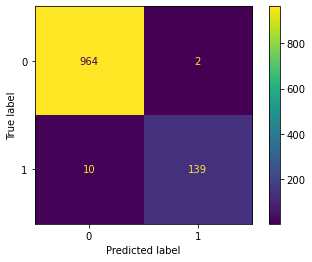

In [168]:
model = LogisticRegression()
model.fit(X_train_vect, y_train)
y_pred = model.predict(X_test_vect)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_vect, y_test)
plt.show()

4. Custom Logistic Regression Implementation:

In [165]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)
    cost = (-1 / m) * np.sum(y * np.log(f_wb + 1e-15) + (1 - y) * np.log(1 - f_wb + 1e-15))
    return cost

def predict(X, w, b):
    f_wb = sigmoid(np.dot(X, w) + b)
    preds = np.where(f_wb >= 0.5, 1, 0)
    return preds

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)
    error = f_wb - y
    dj_dw = (1 / m) * np.dot(X.T, error)
    dj_db = (1 / m) * np.sum(error)
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, iterations, X_val, y_val):
    J_history = []
    precision_history = []
    recall_history = []
    f1_history = []
    accuracy_history = []

    w = w_in.copy()
    b = b_in

    for i in range(iterations):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % (iterations // 10) == 0 or i == iterations-1:
            
            cost = compute_cost(X, y, w, b)
            print(i, ":", cost)
            y_pred_val = predict(X_val, w, b)
            precision = precision_score(y_val, y_pred_val, zero_division=0)
            recall = recall_score(y_val, y_pred_val, zero_division=0)
            f1 = f1_score(y_val, y_pred_val, zero_division=0)
            accuracy = accuracy_score(y_val, y_pred_val)
            J_history.append(cost)
            precision_history.append(precision)
            recall_history.append(recall)
            f1_history.append(f1)
            accuracy_history.append(accuracy)

    return w, b, J_history, precision_history, recall_history, f1_history, accuracy_history

In [166]:
# Initialize parameters
np.random.seed(1)
initial_w = np.zeros(X_train_array.shape[1])
initial_b = 0
alpha = 0.1
iterations = 10000

# Train the model
w, b, J_history, precision_history, recall_history, f1_history, accuracy_history = gradient_descent(
    X_train_array, y_train.to_numpy(), initial_w, initial_b, alpha, iterations, X_test_array, y_test.to_numpy()
)

0 : 0.6700029306057862
1000 : 0.11079990944667899
2000 : 0.084164617548832
3000 : 0.07203477670658291
4000 : 0.06445707022600643
5000 : 0.05902424575956114
6000 : 0.05481842764214135
7000 : 0.05140144255283799
8000 : 0.048533165945322976
9000 : 0.0460688557311118
9999 : 0.04391692132347812


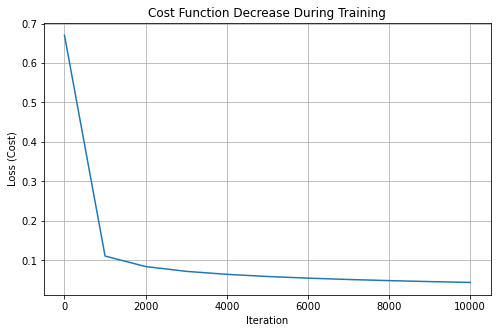

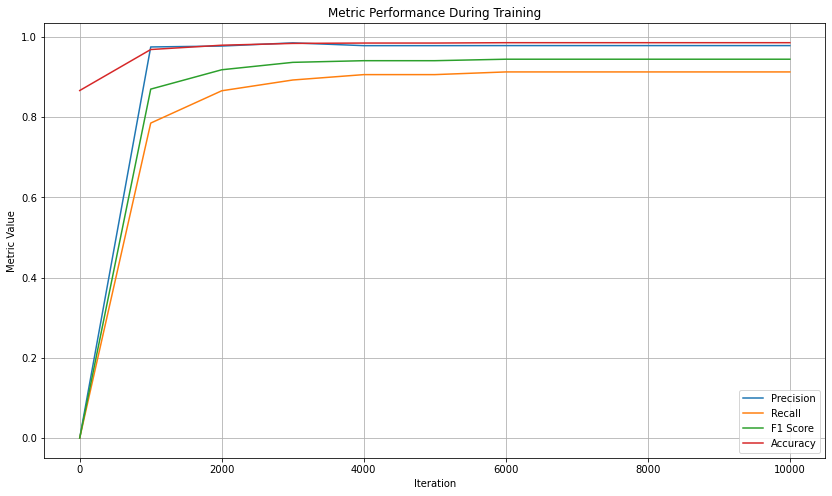

Custom Model Evaluation:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.94       149

    accuracy                           0.99      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



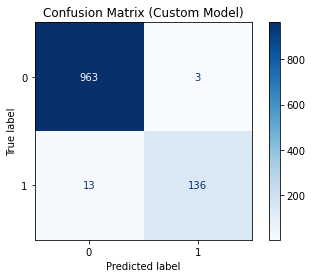

In [167]:
# Plot cost over iterations
plt.figure(figsize=(8,5))
plt.plot(np.linspace(0, iterations, len(J_history)), J_history)
plt.xlabel('Iteration')
plt.ylabel('Loss (Cost)')
plt.title('Cost Function Decrease During Training')
plt.grid(True)
plt.show()

# Plot precision, recall, f1, accuracy over iterations
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0, iterations, len(precision_history)), precision_history, label='Precision')
plt.plot(np.linspace(0, iterations, len(recall_history)), recall_history, label='Recall')
plt.plot(np.linspace(0, iterations, len(f1_history)), f1_history, label='F1 Score')
plt.plot(np.linspace(0, iterations, len(accuracy_history)), accuracy_history, label='Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Metric Value')
plt.title('Metric Performance During Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate final custom model on test set
y_pred_custom = predict(X_test_array, w, b)
print("Custom Model Evaluation:\n")
print(classification_report(y_test, y_pred_custom))

cm_custom = confusion_matrix(y_test, y_pred_custom)
ConfusionMatrixDisplay(confusion_matrix=cm_custom).plot(cmap='Blues')
plt.title('Confusion Matrix (Custom Model)')
plt.show()


## Final Conclusions

### Custom Logistic Regression Performance
- **Accuracy**: 99% on the test set.
- **Precision (spam detection)**: 98% — very few false positives.
- **Recall (spam detection)**: 91% — most spam messages are successfully detected.
- **F1-Score**: 94% — high balance between precision and recall.

### Comparison to scikit-learn
- The custom Logistic Regression model achieves performance almost identical to scikit-learn's `LogisticRegression`.
- The loss function steadily decreased during training, confirming correct gradient descent optimization.

### Strengths
- High generalization ability — model performs extremely well on unseen data.
- Excellent spam detection capability with minimal false alarms.

### Final Thoughts
This project successfully demonstrates that Logistic Regression, even implemented manually, can achieve excellent results on practical binary classification tasks such as spam detection.  
Building the model from scratch deepened understanding of cost functions, gradient descent, and the impact of feature engineering.
